In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd
import csv

G=nx.read_gexf('vk-friends-157062074.gexf')

# Получение матрицы смежности и списков смежности ориентированного и неориентированного графов
G_matrix = nx.to_numpy_matrix(G)
G_undir_matrix = nx.to_numpy_matrix(G.to_undirected())
G_list = nx.to_dict_of_lists(G)
G_undir_list = nx.to_dict_of_lists(G.to_undirected())
G_pd = nx.to_pandas_adjacency(G)

# Запись матрицы смежности в csv формат 
G_pd.to_csv('matrix.csv')

# Запись списка смежности в csv формат 
new_list = []
for i, ls in G_list.items():
    ls.insert(0, i)
    new_list.append(ls)

with open('list.csv', 'w') as f:
    writer = csv.writer(f)
    for i in new_list:
        writer.writerow(i)

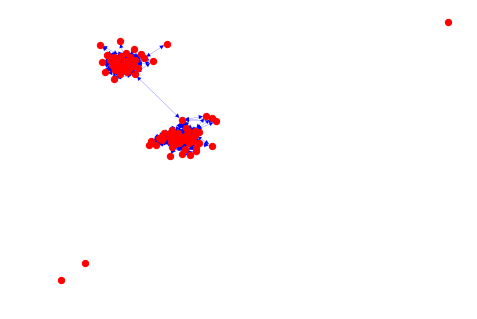

In [7]:
nx.draw(G, node_size = 40, width = 0.1, nodecolor='r', edge_color='b')

In [8]:
def explore(v, comp, u, G):
    if v not in comp:
        u += 1
        pre = u
        comp.update([[v, [0, 0]]])
        for i in G[v]:
            u = explore(i, comp, u, G)
        u += 1
        post = u
        comp[v] = [pre, post]
        return u
    return u

In [9]:
def dfs(V, G):
    components = []
    u = 0
    while V:
        comp = {}
        u = explore(V[0],comp, u, G)
        for i in comp:
            V.remove(i)
        comp = sorted(comp.items(), key = lambda comp: comp[1][1])
        components.append(comp)
    return components

# 1)

In [17]:
# Подсчет количества компонент сильной связности и количества вершин в них с помощью поиска в глубину
G_reversed = nx.reverse_view(G)
G_list_reversed = nx.to_dict_of_lists(G_reversed)
components = dfs(list(G_list_reversed.keys()), G_list_reversed)

V = [j[0] for i in components for j in i]
V.reverse()

components = dfs(V, G_list)
count = 0
for i in components:
    count += 1
    print('Вершин в {} компоненте сильной связности:'.format(count), len(i))
print('Количество сильных компонент связности:', count)

Вершин в 1 компоненте сильной связности: 1
Вершин в 2 компоненте сильной связности: 1
Вершин в 3 компоненте сильной связности: 1
Вершин в 4 компоненте сильной связности: 80
Количество сильных компонент связности: 4


In [18]:
# Подсчет количества компонент слабой связности и количества вершин в них с помощью поиска в глубину
components = dfs(list(G_undir_list.keys()), G_undir_list)
count = 0
for i in components:
    count += 1
    print('Вершин в {} компоненте слабой связности:'.format(count), len(i))
print('Количество слабых компонент связности:', count)

Вершин в 1 компоненте слабой связности: 80
Вершин в 2 компоненте слабой связности: 1
Вершин в 3 компоненте слабой связности: 1
Вершин в 4 компоненте слабой связности: 1
Количество слабых компонент связности: 4


In [19]:
max_length = 0
all_nodes = 0
for i in components:
    if len(i) > max_length:
        max_length = len(i)
        max_comp = i
    all_nodes += len(i)
print('Доля узлов, попавших в наибольшую слабую компоненту связности :',max_length/all_nodes)

Доля узлов, попавших в наибольшую слабую компоненту связности : 0.963855421686747


# 2)

In [20]:
# G_max_comp - наибольшая компонента связности графа без учета ориентации ребер

vertex = [i[0] for i in max_comp]
remove = [i for i in G.to_undirected().node if i not in vertex]
G_max_comp = G.to_undirected()
G_max_comp.remove_nodes_from(remove)
G_max_comp_list = nx.to_dict_of_lists(G_max_comp)
G_max_comp_matrix = nx.to_numpy_matrix(G_max_comp)
ind = list(G_max_comp.nodes)

In [21]:
# Функция Флойда — Уоршелла
from math import inf
def FV(W):
    for i in range(W.shape[0]):
        for j in range(W.shape[0]):
            if W[i, j] == 0:
                W[i, j] = inf
        W[i, i] = 1
    for k in range(W.shape[0]):
        for i in range(W.shape[0]):
            for j in range(W.shape[0]):
                W[i,j] = min(W[i,j], W[i,k] + W[k,j])

In [22]:
# Вычисление степени вершины
degree = {}
for i in G_max_comp_list.keys():
    degree.update([[i,len(G_max_comp_list[i])]])

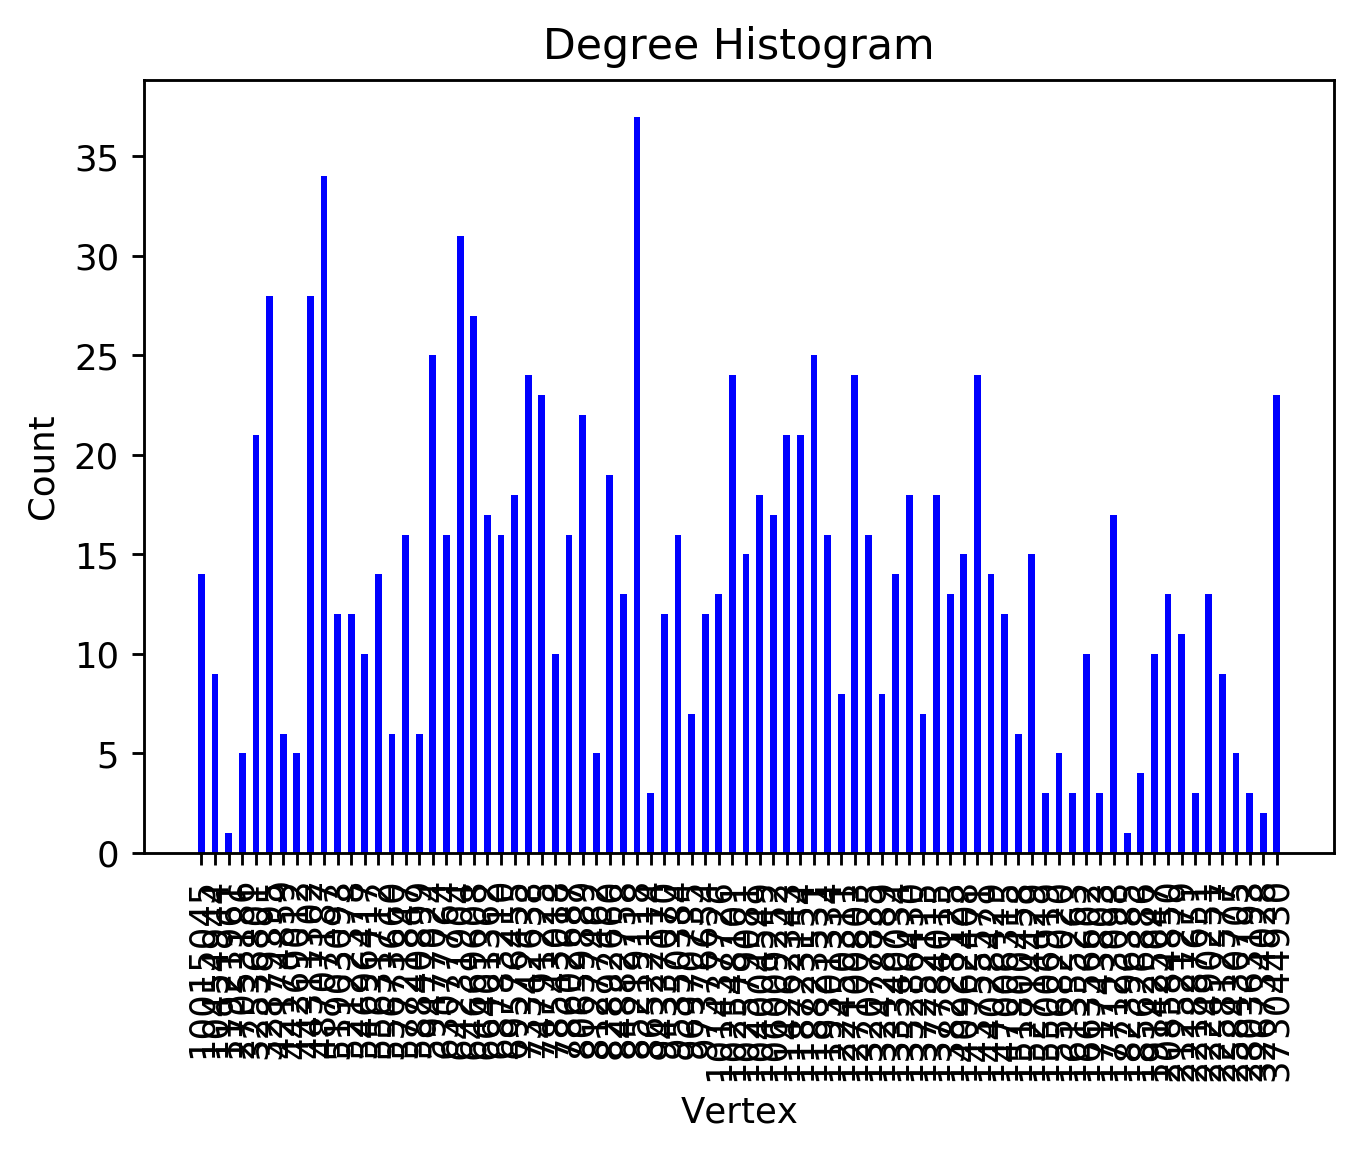

In [28]:
# Построение гистограммы плотности вероятности распределения степеней вершин
fig, ax = plt.subplots(dpi=256)
plot = plt.bar(degree.keys(), degree.values(), width=0.5, color='b')
plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Vertex")
plt.xticks(rotation=90)
ax.set_xticklabels(degree.keys());

In [29]:
print('Средняя степень вершины :', sum(degree.values())/len(degree))

Средняя степень вершины : 13.95


In [30]:
Ways = G_max_comp_matrix.copy()
FV(Ways)

In [31]:
diametr = np.max(Ways)
print('Диаметр графа равен =', diametr)

Диаметр графа равен = 6.0


In [32]:
radius = min([np.max(i) for i in Ways])
print('Радиус графа равен =', radius)

Радиус графа равен = 3.0


In [33]:
central = []
per = []
for i in range(Ways.shape[0]):
    if np.max(Ways[i]) == radius:
        central.append(ind[i])
    if np.max(Ways[i]) == diametr:
        per.append(ind[i])
print('Id вершин, являющихся центральными :')
print(central)
print('Id вершин, являющихся переферийными :')
print(per)

Id вершин, являющихся центральными :
['132077835']
Id вершин, являющихся переферийными :
['11921961', '42174859', '78543018', '96970735', '97376654', '132428789', '137252115', '138228125', '151800458', '155006919', '182396385', '225812577', '326734028']


In [34]:
print('Средняя длина пути в графе :', np.mean(Ways))

Средняя длина пути в графе : 2.8203125


# 3)

In [35]:
# Функция, возвращающая список всех соседей вершины
def N(id):
    return G_max_comp_list[id]

In [36]:
# Функция, применяющая функции меры к матрице смежности
def mera(W, func):
    for i in G_max_comp_list.keys():
        for j in G_max_comp_list.keys():
            W[ind.index(i), ind.index(j)] = func(i, j)

In [37]:
def common_neighbors(x, y):
    return len(set(N(x)).intersection(set(N(y))))

In [38]:
def jaccard_coefficient(x, y):
    return len(set(N(x)).intersection(set(N(y))))/len(set(N(x)).union(set(N(y))))

In [39]:
from math import log
def adamic_adar(x, y):
    return sum([1/log(len(N(z))) if len(N(z))!=1 else 0 for z in set(N(x)).intersection(set(N(y)))])

In [40]:
def preferential_attachment(x, y):
    return len(N(x))*len(N(y))

In [41]:
# Вычисление и запись матриц мер 
W = np.zeros(G_max_comp_matrix.shape)
mera(W, common_neighbors)
print(W)
res = pd.DataFrame(W, index=ind)
res.to_csv('common_neighbors.csv', header=ind)

[[14.  6.  0. ...  2.  0. 11.]
 [ 6.  9.  0. ...  2.  0.  7.]
 [ 0.  0.  1. ...  0.  0.  0.]
 ...
 [ 2.  2.  0. ...  3.  0.  2.]
 [ 0.  0.  0. ...  0.  2.  0.]
 [11.  7.  0. ...  2.  0. 23.]]


In [42]:
W = np.zeros(G_max_comp_matrix.shape)
mera(W, jaccard_coefficient)
print(W)
res = pd.DataFrame(W, index=ind)
res.to_csv('jaccard_coefficient.csv', header=ind)

[[1.         0.35294118 0.         ... 0.13333333 0.         0.42307692]
 [0.35294118 1.         0.         ... 0.2        0.         0.28      ]
 [0.         0.         1.         ... 0.         0.         0.        ]
 ...
 [0.13333333 0.2        0.         ... 1.         0.         0.08333333]
 [0.         0.         0.         ... 0.         1.         0.        ]
 [0.42307692 0.28       0.         ... 0.08333333 0.         1.        ]]


In [43]:
W = np.zeros(G_max_comp_matrix.shape)
mera(W, adamic_adar)
print(W)
res = pd.DataFrame(W, index=ind)
res.to_csv('adamic_adar.csv', header=ind)

[[4.66053526 1.81591153 0.         ... 0.57703952 0.         3.68972583]
 [1.81591153 2.79594999 0.         ... 0.57703952 0.         2.14406956]
 [0.         0.         0.31465798 ... 0.         0.         0.        ]
 ...
 [0.57703952 0.57703952 0.         ... 0.92301578 0.         0.57703952]
 [0.         0.         0.         ... 0.         0.819462   0.        ]
 [3.68972583 2.14406956 0.         ... 0.57703952 0.         7.96111016]]


In [44]:
W = np.zeros(G_max_comp_matrix.shape)
mera(W, preferential_attachment)
print(W)
res = pd.DataFrame(W, index=ind)
res.to_csv('preferential_attachment.csv', header=ind)

[[196. 126.  14. ...  42.  28. 322.]
 [126.  81.   9. ...  27.  18. 207.]
 [ 14.   9.   1. ...   3.   2.  23.]
 ...
 [ 42.  27.   3. ...   9.   6.  69.]
 [ 28.  18.   2. ...   6.   4.  46.]
 [322. 207.  23. ...  69.  46. 529.]]


# 4)

In [45]:
def degree_centrality(id):
    return len(N(id))/(len(G_max_comp_list.keys())-1)

In [46]:
def closeness_centrality(id):
    return ((len(G_max_comp_list.keys()) - 1)/(np.sum(Ways[ind.index(id)]) - Ways[ind.index(id), ind.index(id)]))

In [47]:
vector = np.linalg.eig(G_max_comp_matrix)[1][:,[np.linalg.eig(G_max_comp_matrix)[0].argmax(axis=0)]]
def eigenvector_centrality(id):
    return vector[ind.index(id)]

In [48]:
def eigenvector_centrality(id):
    return vector[ind.index(id)]

In [49]:
def metrics_count(d, metric):
    for i in ind:
        d.update({i: metric(i)})

c:\users\kiril\appdata\local\programs\python\python37-32\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


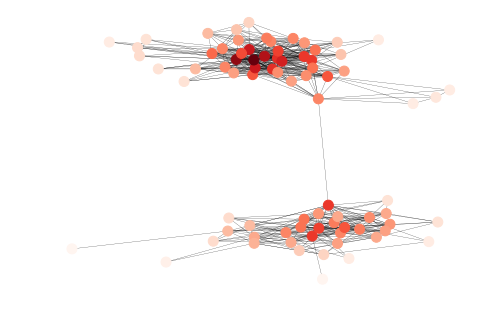

In [50]:
degree = {}
metrics_count(degree, degree_centrality)
nx.draw(G_max_comp, pos=None, node_size=100, node_color=list(degree.values()), width = 0.2, cmap=plt.cm.Reds) 
plt.draw()

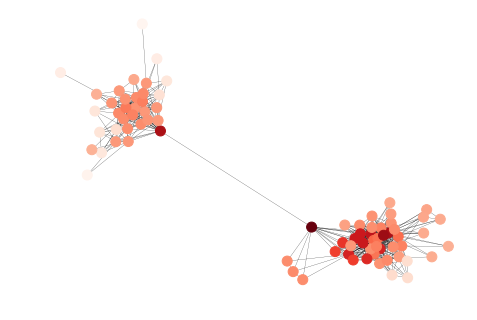

In [51]:
closeness = {}
metrics_count(closeness, closeness_centrality)
nx.draw(G_max_comp, pos=None, node_size=100, node_color=list(closeness.values()), width = 0.2, cmap=plt.cm.Reds) 
plt.draw()

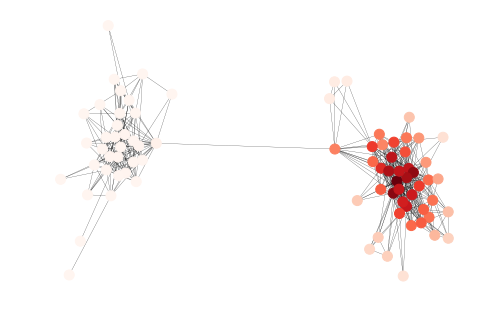

In [52]:
eigenvector = {}
metrics_count(eigenvector, eigenvector_centrality)

for key, val in eigenvector.items():
    eigenvector[key] = val[0,0]
    
nx.draw(G_max_comp, pos=None, node_size=100, node_color=list(eigenvector.values()), width = 0.2, cmap=plt.cm.Reds) 
plt.draw()

In [62]:
# Функция БФС
import collections
def bfs(u):
    deque = collections.deque()
    deque.append(u)
    pos = [u]
    distance = {u:0}
    while deque:
        el = deque.popleft()
        for i in G_max_comp_list[el]:
            if i not in pos:
                pos.append(i)
                distance.update([[i, distance[el] + 1]])
                deque.append(i) 
    return distance

In [63]:
# Вычисление кратчайших путей по БФС (вершины)
def short_ways(u, v, distance, ways, all_ways):
    ways.append(v)
    if u == v:
        all_ways.append(ways)
    for i in G_max_comp_list[v]:
        if distance[i] == distance[v] - 1:
            new_way = ways.copy()
            short_ways(u, i, distance, new_way, all_ways)
    return all_ways

In [64]:
# Вычисление коэффициэнтов gj, gji (для вершин)
def gjk(k,Y):
    g = 0
    gi = 0
    g = len(Y)
    for j in Y:
        if k in j:
            gi += 1
    return g, gi

In [65]:
# из i in j подсчёт k
def betweenness_centrality():
    m = dict.fromkeys(G_max_comp_list, 0)
    for i in ind:
        for j in ind:
            A = bfs(i)
            Y = short_ways(i, j, A, [], [])
            for k in ind:
                if i != j and k!= i and k!=j:
                    a, b =  gjk(k, Y)
                    s = b/a/(len(G_max_comp_list) - 1)/(len(G_max_comp_list) - 2)
                    m.update([[k, m[k] + s]])
    return m

In [66]:
x = betweenness_centrality()

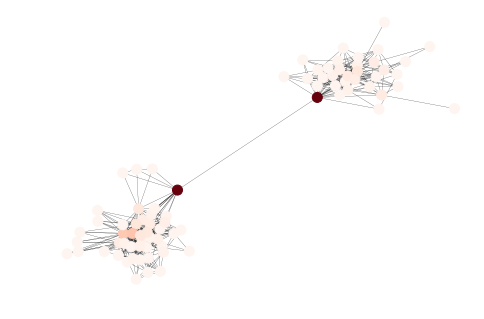

In [67]:
nx.draw(G_max_comp, pos=None, node_size=100, node_color=list(x.values()), width = 0.2, cmap=plt.cm.Reds) 
plt.draw()

In [68]:
# Вычисляем рёбра из списка смежности
edges = []
for i in ind:
    for j in G_max_comp_list[i]:
        if ((i, j) not in edges) and ((j, i) not in edges):
            edges.append((i,j)) 

In [73]:
# Вычисление кратчайших путей по БФС (рёбра)
def short_ways_edges(u, v, distance, ways, all_ways, last):
    ways.append(set([last,v]))
    if u == v:
        all_ways.append(ways)
    for i in G_max_comp_list[v]:
        if distance[i] == distance[v] - 1:
            last = v
            new_way = ways.copy()
            short_ways_edges(u, i, distance, new_way, all_ways, last)
    return all_ways

In [74]:
# Вычисление коэффициэнтов gj, gji (для рёбер)
def gjk_edges(k,Y):
    g = 0
    gi = 0
    g = len(Y)
    for j in Y:
        if set(k) in j:
            gi += 1
    return g, gi

In [75]:
def edge_betweenness_centrality():
    m = dict.fromkeys(edges, 0)
    for i in ind:
        for j in ind:
            A = bfs(i)
            Y = short_ways_edges(i, j, A, [], [], j)
            for k in edges:
                a, b =  gjk_edges(k, Y)
                s = b/a/(len(G_max_comp_list))/(len(G_max_comp_list) - 1)
                m.update([[k, m[k] + s]])
    return m

In [76]:
x = edge_betweenness_centrality()

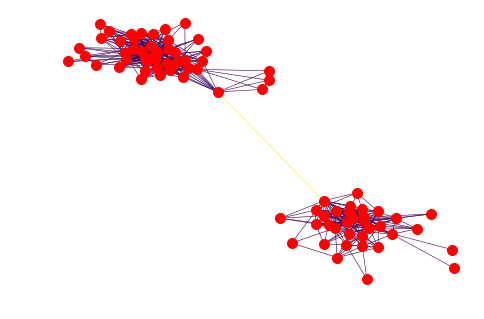

In [77]:
nx.draw(G_max_comp, pos=None, node_size=100, edge_color = list(x.values()), width = 0.6, cmap=plt.cm.Reds) 
plt.draw()